In [11]:
# Importing the libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Importing the dataset
dataset = pd.read_csv('Diabetes.csv')
print(dataset.head())


   glucose  bloodpressure  diabetes
0       40             85         0
1       40             92         0
2       45             63         1
3       45             80         0
4       40             73         1


In [14]:
X = dataset.iloc[:, [0,1]].values
y = dataset.iloc[:,2].values

In [15]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [16]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train[:3])

[[ 0.08705845  1.11441825]
 [ 0.08705845 -0.71533994]
 [-0.66812298  1.32968392]]


In [18]:
# Fitting Naive Bayes to the Training Set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


GaussianNB()

In [19]:
# Predicitn the Test Set results
y_pred = classifier.predict(X_test)

#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm 

array([[ 98,   6],
       [ 13, 132]])

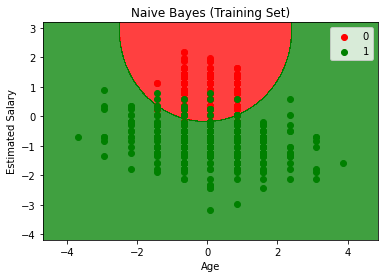

In [20]:
# Visualising the Training Set results
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:,0].max() + 1, step =0.01 ),
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:,1].max() + 1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)) :
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
              c = ListedColormap(('red','green'))(i),label = j)

plt.title("Naive Bayes (Training Set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show() 

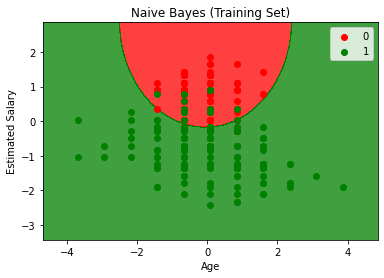

In [22]:
# Visualising the Test Set results
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:,0].max() + 1, step =0.01 ),
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:,1].max() + 1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)) :
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
              c = ListedColormap(('red','green'))(i),label = j)

plt.title("Naive Bayes (Training Set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show() 

In [23]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       104
           1       0.96      0.91      0.93       145

    accuracy                           0.92       249
   macro avg       0.92      0.93      0.92       249
weighted avg       0.93      0.92      0.92       249

